In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *
from ATS.stats import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots online
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-11 18:06:30.596526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-11 18:06:30.596658: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<Item title:"SAC_JOC_61_01_Cage_Installation" type:Feature Layer Collection owner:Anooshi>
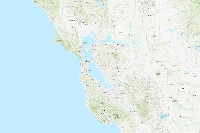

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('0de0075fb0364f7685a55ce6faa42ecf')
data = output['data0']
feature_service = output['feature_service']


In [3]:
# Subset data for desired year.
data.rename(columns={"SurveyDate": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()


Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 5823


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Cage_Installed,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,GlobalID,Species,SHAPE
0,10,2021-03-12 21:59:12,Roger Stephens,None,Yes,None,GNSS:93782,NaN,0.472212,8417d3e0-4af0-453a-9dd2-e5a7856e4a4e,Quercus lobata,"{""x"": 6185381.814117534, ""y"": 2036772.86876946..."
1,11,2020-11-17 17:36:50,Brian Creeks,None,No,None,GNSS:93782,NaN,0.788449,10ed97f1-f05b-4a1b-8d28-46174df5e067,Quercus lobata,"{""x"": 6185357.073842618, ""y"": 2036843.44340712..."
2,12,2020-11-17 17:38:26,Brian Creeks,None,No,None,GNSS:93782,NaN,0.945897,d5b6428a-d374-402c-bf87-b8772acc5667,Quercus lobata,"{""x"": 6185340.777144618, ""y"": 2036819.91446248..."
3,13,2021-03-12 21:58:50,Roger Stephens,None,Yes,None,GNSS:93782,NaN,0.484630,2fb10842-0689-4d8d-9401-5bffb0f98ebc,Quercus lobata,"{""x"": 6185334.515395351, ""y"": 2036793.16987180..."
4,14,2021-03-12 21:53:05,Roger Stephens,None,Yes,None,GNSS:93782,NaN,0.510508,25f1588c-443c-4f0b-9010-7c74f84ead0e,Quercus lobata,"{""x"": 6185273.358715686, ""y"": 2036893.27609247..."


In [6]:
# QAQC

In [4]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])


Subset 
# of rows:
 5823


In [5]:
# Validate domains
validate_domains(feature_service)



Table/Layer:  Cage_Installation


No Mismatches Found


Table/Layer:  Cage_Installation_Target_Areas


No Mismatches Found


In [6]:
# Check for white spaces

QAQC_whitespace(data, ['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Cage_Installed
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [7]:
# QAQC Find blank entries
find_blank_entries(sub, exclude_cols=['Surveyor_2','Comments','ESRIGNSS_H_RMS','ESRIGNSS_RECEIVER','ESRIGNSS_AVG_H_RMS'])

No blank SHAPE
No blank Observation_Date
No blank Surveyor_1
Blank Species entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Cage_Installed,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,GlobalID,Species,SHAPE
1319,1357,2021-02-18 19:49:58,Kevin Sherrill,None,No,Creek crossing possible.,None,NaN,NaN,3cded017-5bb7-41cf-8047-f38f8d7abdd0,None,"{""x"": 6189379.897669841, ""y"": 2037933.759072547, ""spatialReference..."
1320,1358,2021-02-18 19:52:13,Kevin Sherrill,None,No,Creek crossing possible.,None,NaN,NaN,145b6bcb-1a14-4fa4-8dcd-d17fc1258773,None,"{""x"": 6189582.792665494, ""y"": 2037815.1493616085, ""spatialReferenc..."
1321,1359,2021-02-18 19:55:52,Kevin Sherrill,None,No,Creek crossing possible.,None,NaN,NaN,1931c94d-e8d9-4668-80dc-46bf38039db8,None,"{""x"": 6189949.30232631, ""y"": 2037680.2704488041, ""spatialReference..."
1322,1360,2021-02-18 19:58:10,Kevin Sherrill,None,No,Creek crossing possible.,GNSS:93782,NaN,0.994133,b271933a-16fa-42dd-bdeb-8ee3e463b853,None,"{""x"": 6190206.4767755, ""y"": 2037673.5440984988, ""spatialReference""..."
1363,1401,2021-02-22 18:14:27,Silas Ellison,None,Yes,Species is AECA.,GNSS:93782,NaN,1.411105,ec824b60-dfd8-4b1e-9bdf-3e92ba0ee13f,None,"{""x"": 6188613.260996025, ""y"": 2037928.1228710783, ""spatialReferenc..."
1452,1490,2021-02-22 19:19:27,Silas Ellison,None,Yes,Species is AECA.,GNSS:93782,NaN,0.862171,4b4f732d-15da-42a9-994e-65ea3555bfb1,None,"{""x"": 6188285.738278098, ""y"": 2037937.8614131615, ""spatialReferenc..."
2115,2154,2021-02-26 19:35:18,Kevin Sherrill,None,No,Potential stream crossing.,None,NaN,NaN,faaea093-f55c-4073-8bca-f594733e5b34,None,"{""x"": 6186709.691197525, ""y"": 2038059.16226417, ""spatialReference""..."
3532,3613,2021-03-12 20:02:06,Roger Stephens,None,No,Alive but not marked. Buckeye.,GNSS:97850,NaN,0.713542,ccaacb0a-9612-42b9-8286-6dfcd0930cf4,None,"{""x"": 6184131.71440976, ""y"": 2037441.6428735338, ""spatialReference..."
3537,3619,2021-03-12 20:03:02,Roger Stephens,None,No,Alive but not marked. Buckeye.,GNSS:97850,NaN,0.715555,ed802772-b6f2-4c3d-a36b-b9b9bdfc6eee,None,"{""x"": 6183997.326055179, ""y"": 2037399.4196728037, ""spatialReferenc..."
3542,3624,2021-03-12 20:18:06,Roger Stephens,None,No,Alive but not marked. Buckeye.,GNSS:97850,NaN,0.742963,bb4e2cbe-c952-43d5-bd45-1343f50743a5,None,"{""x"": 6184278.15245872, ""y"": 2037265.3291724264, ""spatialReference..."


No blank Cage_Installed
No blank GlobalID
No blank OBJECTID


In [8]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Cage_Installed', 'Comments', 'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS',
       'ESRIGNSS_AVG_H_RMS', 'GlobalID', 'Species', 'SHAPE'],
      dtype='object')

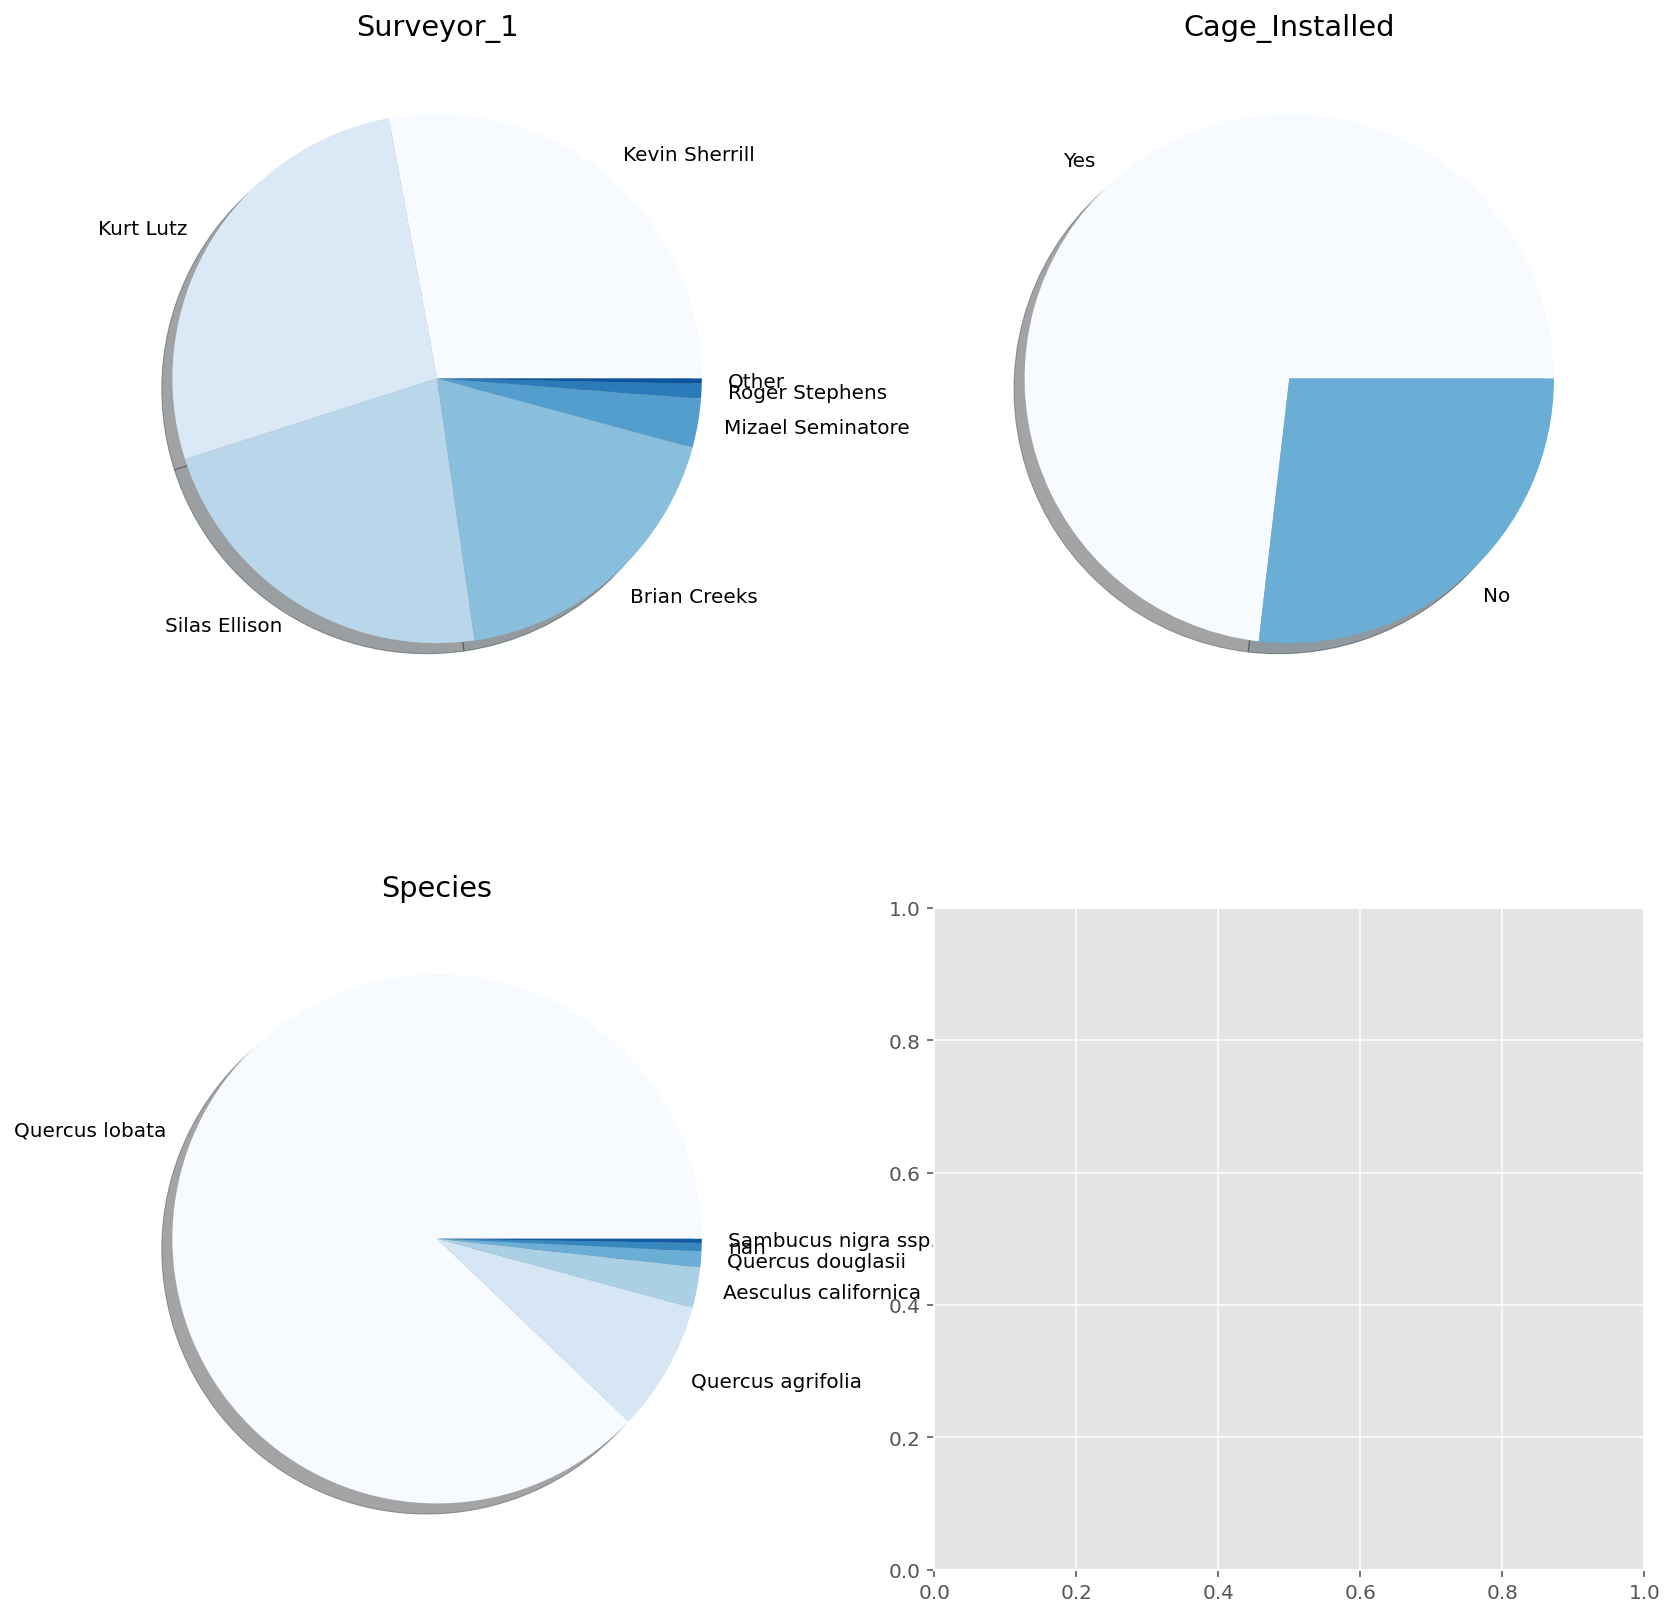

In [9]:
#Visualize data

QAQC_plot(sub,['Surveyor_1','Cage_Installed','Species'])

Dropping surveyors with less than 289.7 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Mizael Seminatore' 'Roger Stephens' 'Other']


Dropping surveyors with less than 291.15000000000003 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Mizael Seminatore' 'Roger Stephens' 'Other']


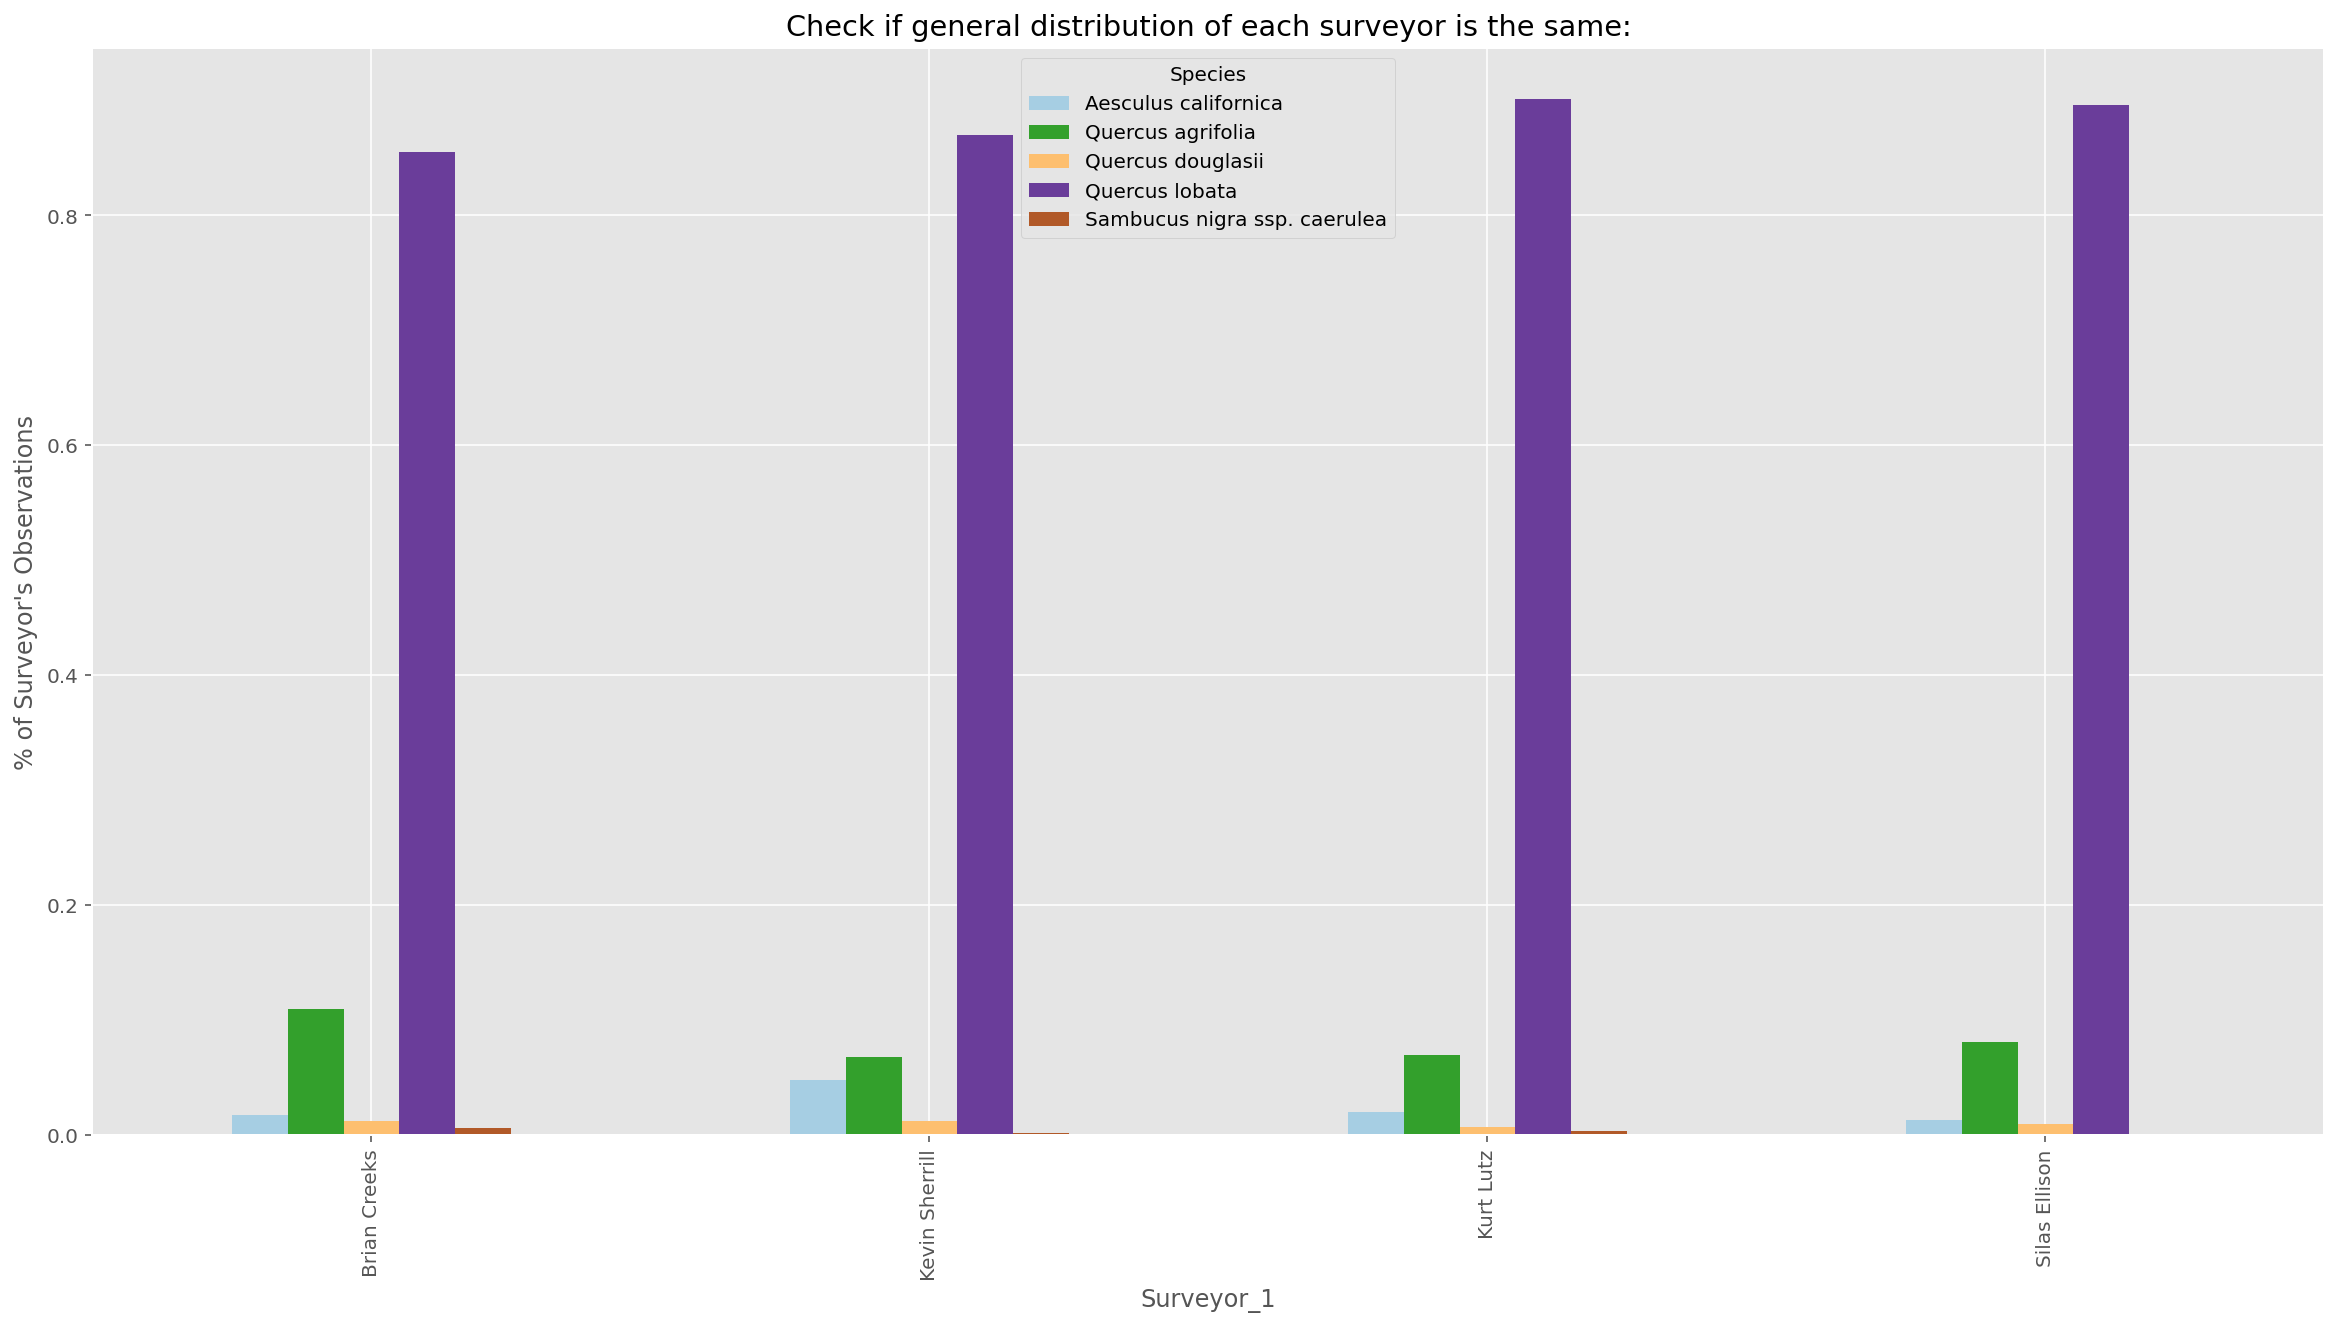

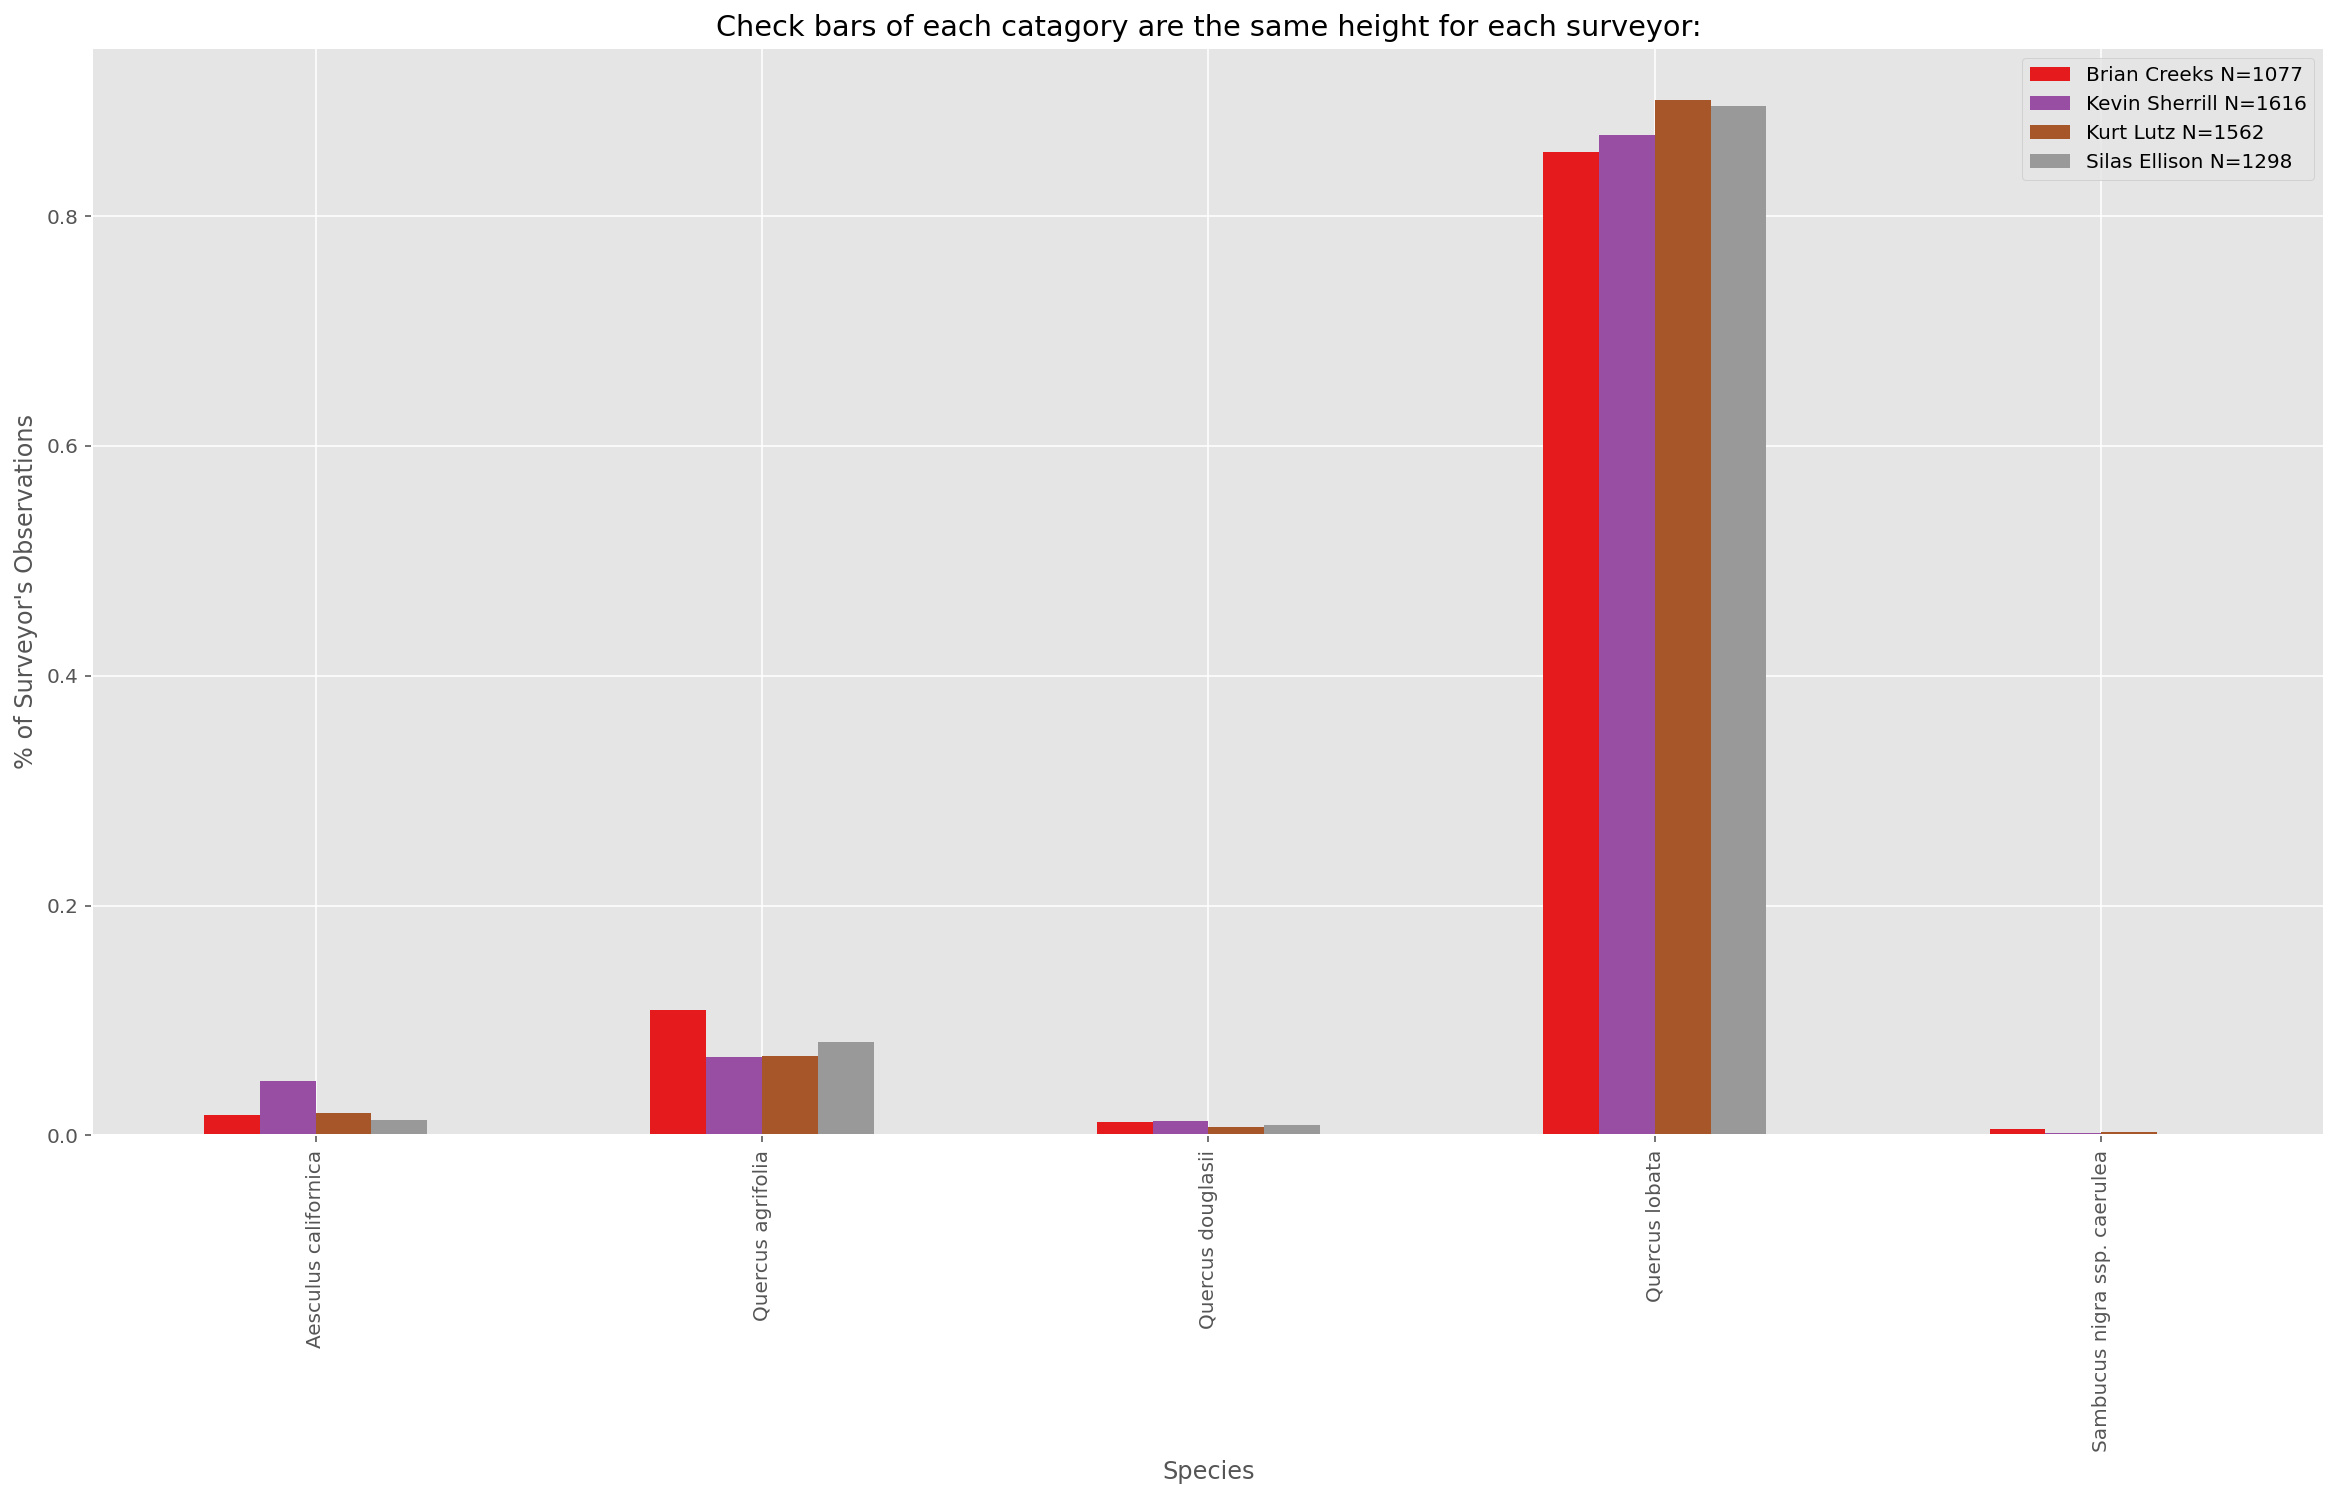

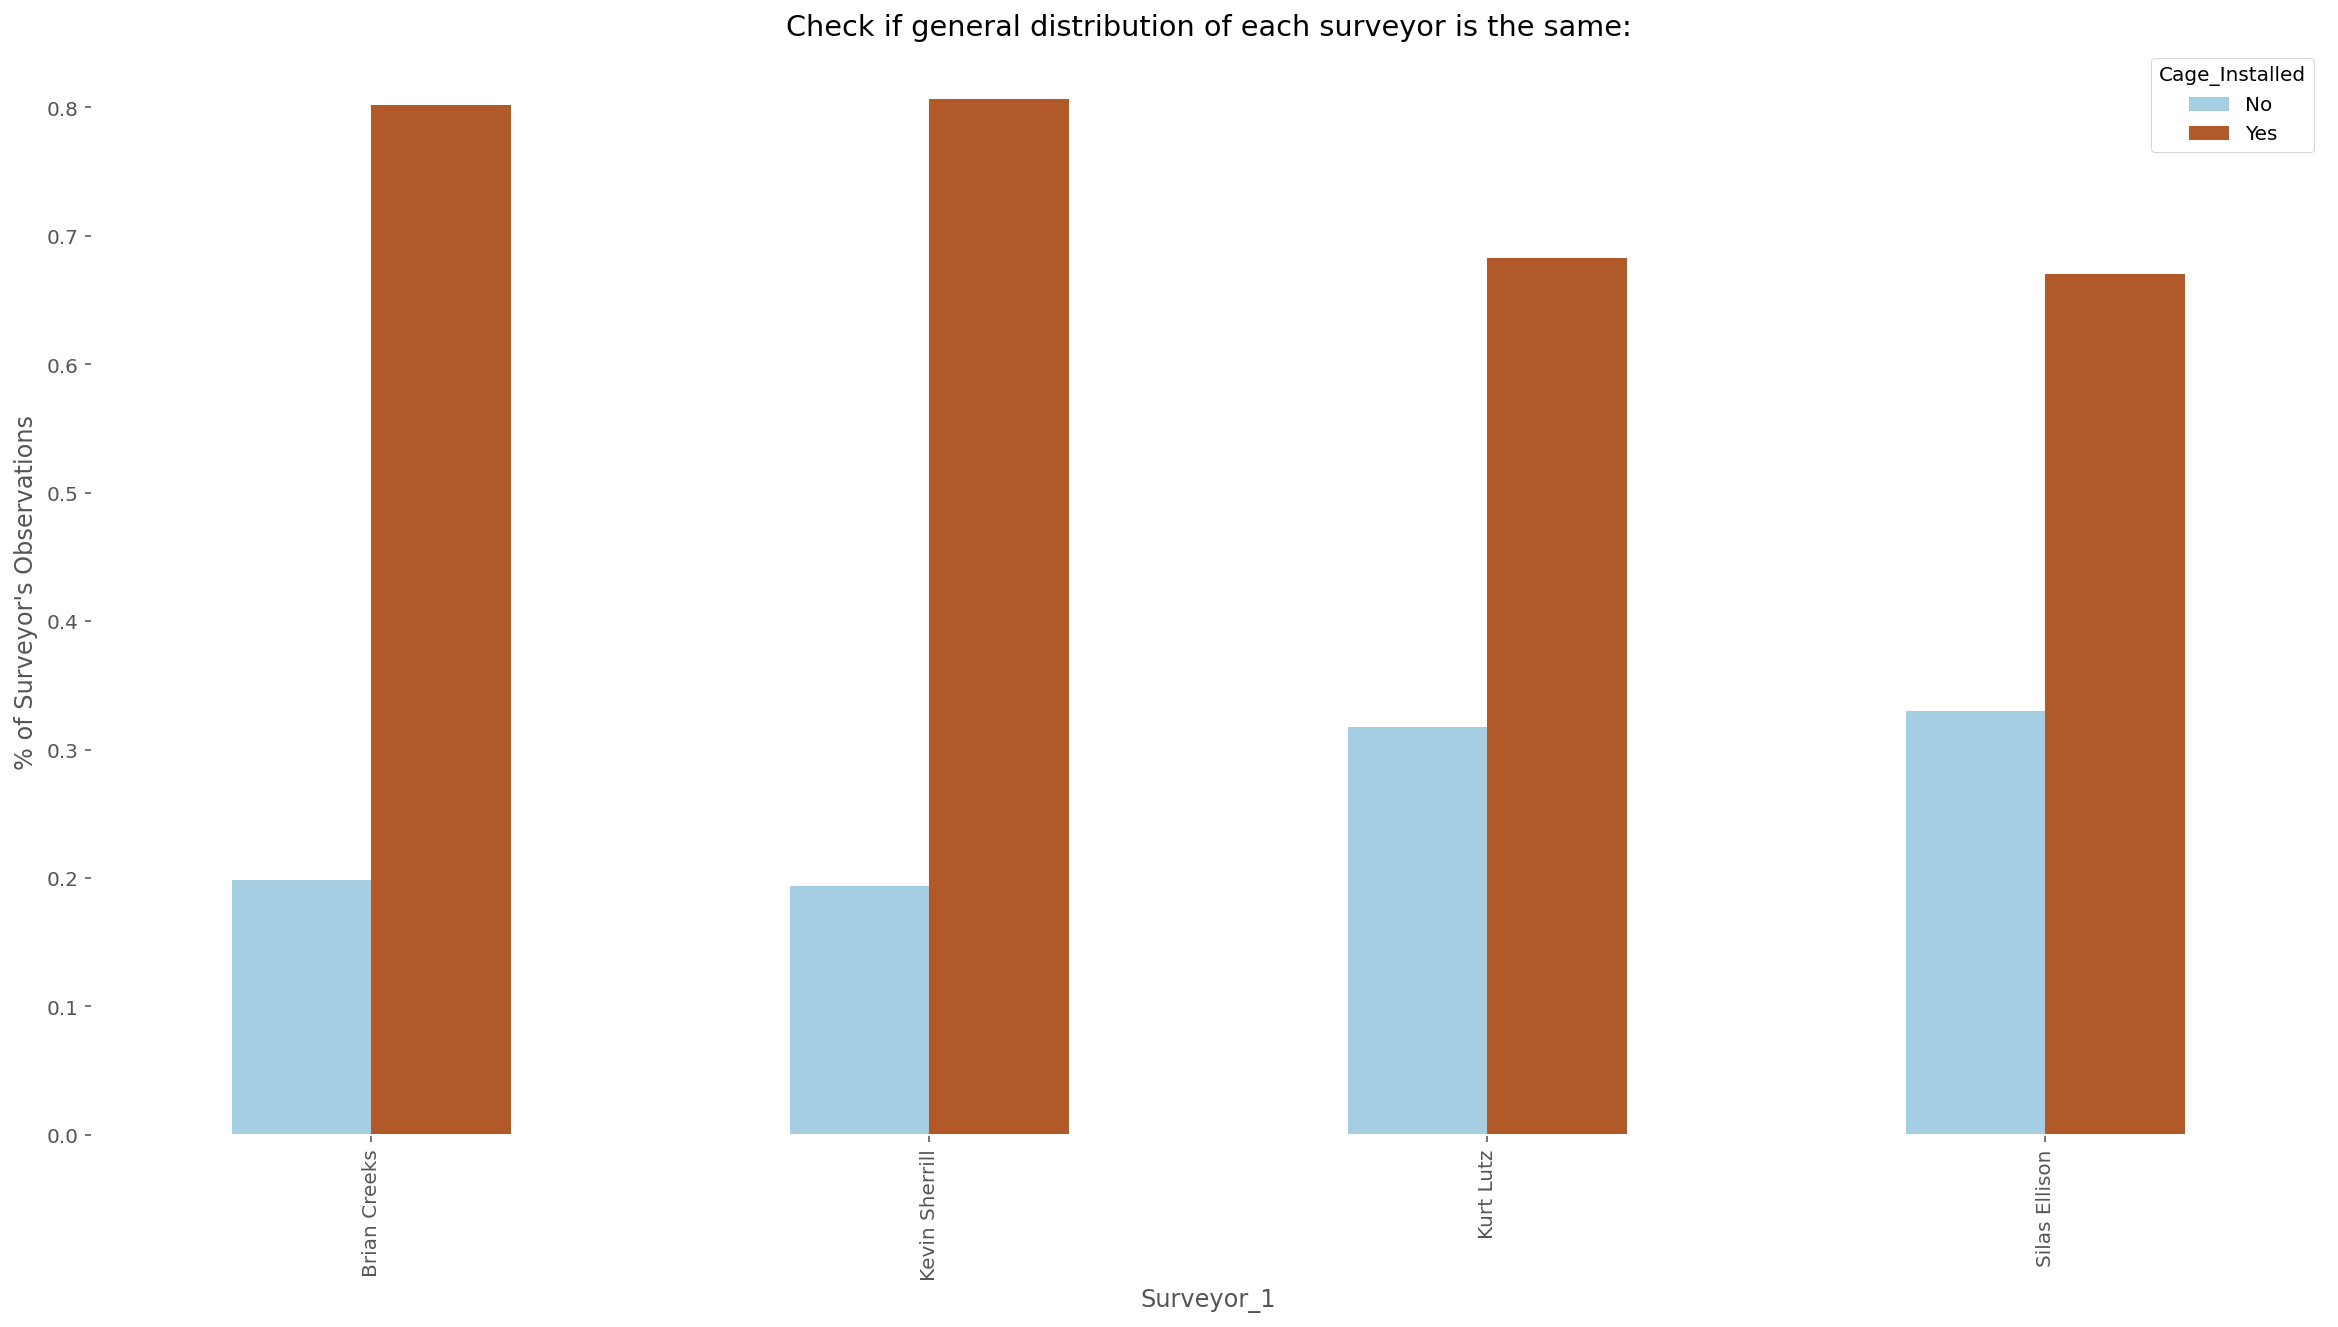

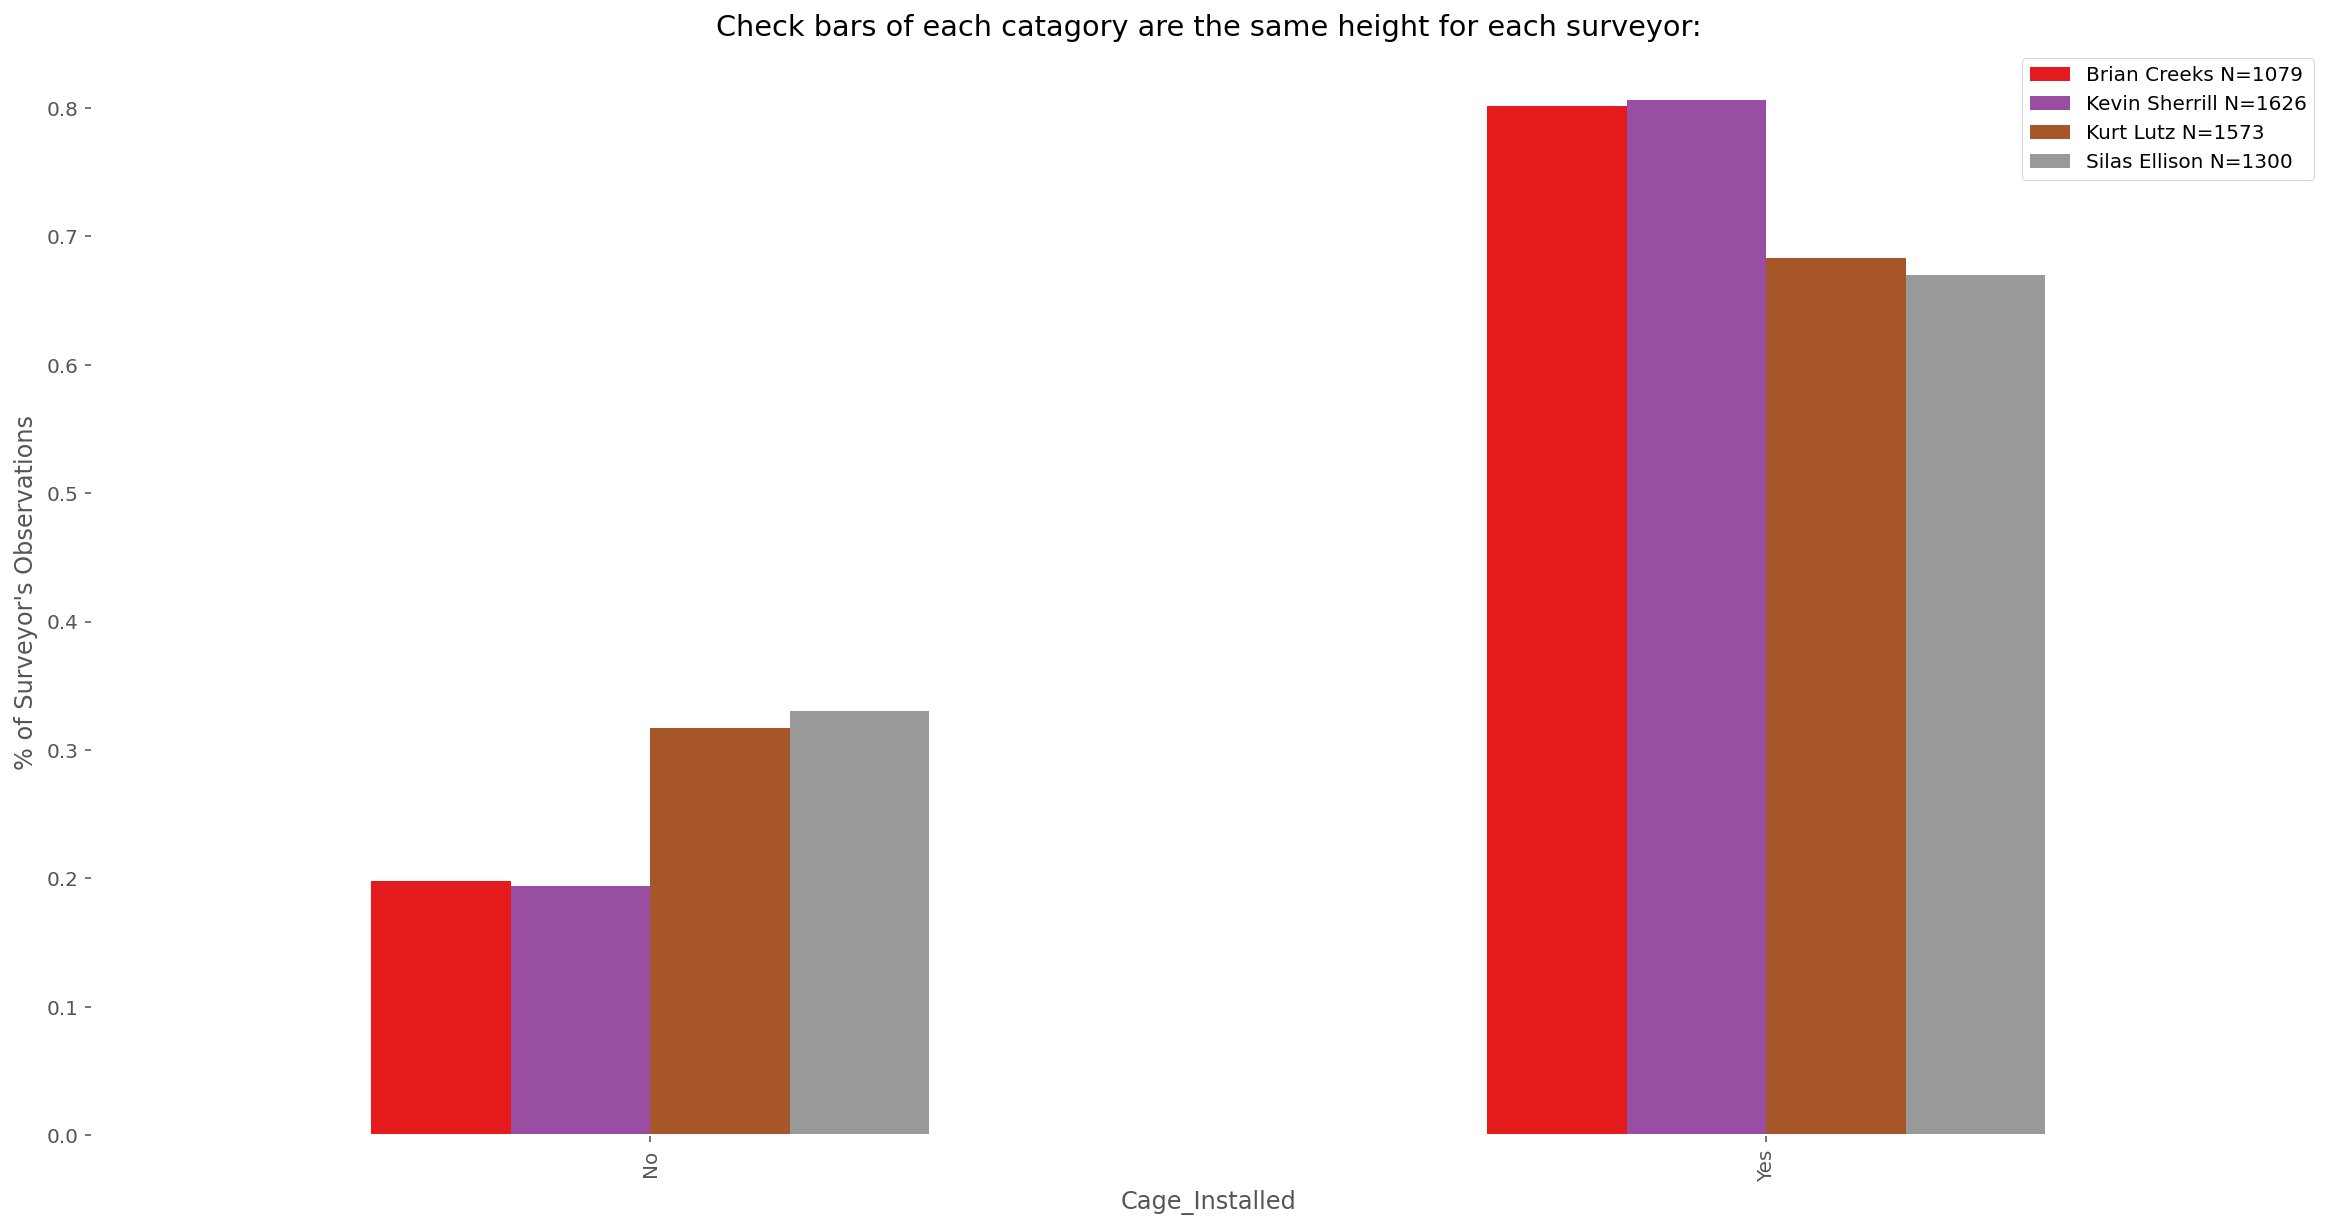

In [10]:
#Compare surveyors


compare_surveyors(sub, 'Species', 'Surveyor_1', 5)
compare_surveyors(sub, 'Cage_Installed', 'Surveyor_1', 5)

In [33]:
# Check thatl Caged entries have no blank species ID

alive_R = data.loc[(data.Cage_Installed == 'Yes') & (data.Species.isna()),]

if not alive_R.empty:
    print('The following entries have a caged tree, but no species ID recorded.')
    display(alive_R)
    len(alive_R)
else:
    print('No issues')
    


The following entries have a caged tree, but no species ID recorded.


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Cage_Installed,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,GlobalID,Species,SHAPE
1363,1401,2021-02-22 18:14:27,Silas Ellison,None,Yes,Species is AECA.,GNSS:93782,NaN,1.411105,ec824b60-dfd8-4b1e-9bdf-3e92ba0ee13f,None,"{""x"": 6188613.260996025, ""y"": 2037928.1228710783, ""spatialReferenc..."
1452,1490,2021-02-22 19:19:27,Silas Ellison,None,Yes,Species is AECA.,GNSS:93782,NaN,0.862171,4b4f732d-15da-42a9-994e-65ea3555bfb1,None,"{""x"": 6188285.738278098, ""y"": 2037937.8614131615, ""spatialReferenc..."
3546,3628,2021-03-22 20:06:00,Kevin Sherrill,None,Yes,Buckeye barely leafing out. QUDO flag.,GNSS:97850,NaN,0.577414,658c0927-c6df-439b-aa11-4ae5b70f3308,None,"{""x"": 6184744.477766592, ""y"": 2036912.1438713663, ""spatialReferenc..."
3553,3635,2021-03-23 16:02:37,Kevin Sherrill,None,Yes,Buckeye,GNSS:93782,NaN,0.747379,a7eb3911-9c1c-47e3-afbc-108d3e3c9e90,None,"{""x"": 6184457.658307688, ""y"": 2036858.5093644934, ""spatialReferenc..."
3733,3815,2021-04-09 19:01:55,Kurt Lutz,None,Yes,Alive but not marked. Buckeye.,GNSS:93782,NaN,0.710893,0e7ab7b1-4d1f-4e39-894b-7fcdaadf7652,None,"{""x"": 6184096.95079207, ""y"": 2037355.1805180307, ""spatialReference..."
5069,5171,2021-06-11 17:55:20,Kurt Lutz,None,Yes,"Unknown species, not painted. Missing.",GNSS:84087,NaN,1.096955,c9764ba2-9a2c-4533-a447-1001f658eefe,None,"{""x"": 6182429.859802187, ""y"": 2036225.3680067428, ""spatialReferenc..."
5184,5286,2021-06-11 18:09:50,Kurt Lutz,None,Yes,No tree. SYMALB inside tube.,GNSS:84087,NaN,1.437999,a1920fe8-8b5a-4774-95a5-37adedc699fd,None,"{""x"": 6182217.1856433265, ""y"": 2036204.7194351188, ""spatialReferen..."
5425,5527,2021-06-16 16:57:27,Kevin Sherrill,None,Yes,Symphoricarpus caged.,GNSS:97850,NaN,0.854087,bca42150-0e90-41bc-9a1e-34e52bc19713,None,"{""x"": 6185924.405690414, ""y"": 2037687.5585940683, ""spatialReferenc..."
5726,5828,2021-08-25 18:30:10,Brian Creeks,None,Yes,Crew mistakenly caged a planted and tubed SYMALB. Not a tree.,iPhone XR,NaN,4.714320,b53a1304-4d96-4a75-b19a-b66802270b7b,None,"{""x"": 6181623.297641316, ""y"": 2036892.7061063992, ""spatialReferenc..."


In [12]:
#Check how many entries taken without an R1
NoR1 = data.loc[(data.ESRIGNSS_RECEIVER != 'GNSS:93782') 
                & (data.ESRIGNSS_RECEIVER != 'GNSS:97850') 
                & (data.ESRIGNSS_RECEIVER != 'GNSS:84087') 
                & (data.ESRIGNSS_RECEIVER != 'GNSS:99337')]
print(NoR1.shape[0], 'entries taken without an R1')
display(NoR1)

296 entries taken without an R1


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Cage_Installed,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,GlobalID,Species,SHAPE
1071,1108,2021-02-17 17:18:40,Kurt Lutz,None,Yes,Caged on 20210216. Not previously mapped.,iPad 6,NaN,5.000000,ba6a7f28-2eba-40c0-9fec-b36109f86936,Quercus lobata,"{""x"": 6191126.449837617, ""y"": 2036939.5209765034, ""spatialReferenc..."
1072,1109,2021-02-17 17:21:42,Kurt Lutz,None,Yes,Caged on 20210216. Not previously mapped.,iPad 6,NaN,5.000000,9d293bf5-3c93-4234-8ffc-d6f7a3f3d4b3,Quercus lobata,"{""x"": 6191090.630859362, ""y"": 2037022.2465428044, ""spatialReferenc..."
1073,1110,2021-02-17 17:22:08,Kurt Lutz,None,Yes,Point was not previously mapped.,None,NaN,NaN,4c302bad-63f5-4c73-b68e-2b4ce22f8637,Quercus lobata,"{""x"": 6191082.1590962, ""y"": 2037014.238999382, ""spatialReference"":..."
1108,1145,2021-09-03 18:02:47,Brian Creeks,None,Yes,None,iPhone XR,NaN,4.899986,8b1d62da-3bb6-40f0-b240-390c0cc36a37,Quercus lobata,"{""x"": 6190261.73721711, ""y"": 2037745.6790545585, ""spatialReference..."
1243,1280,2021-02-19 06:49:36,Kevin Sherrill,None,Yes,None,"iPad11,2",NaN,4.086751,73357219-b288-48ca-ad95-55c5d923bc38,Quercus lobata,"{""x"": 6189522.109803648, ""y"": 2038062.0055368745, ""spatialReferenc..."
1319,1357,2021-02-18 19:49:58,Kevin Sherrill,None,No,Creek crossing possible.,None,NaN,NaN,3cded017-5bb7-41cf-8047-f38f8d7abdd0,None,"{""x"": 6189379.897669841, ""y"": 2037933.759072547, ""spatialReference..."
1320,1358,2021-02-18 19:52:13,Kevin Sherrill,None,No,Creek crossing possible.,None,NaN,NaN,145b6bcb-1a14-4fa4-8dcd-d17fc1258773,None,"{""x"": 6189582.792665494, ""y"": 2037815.1493616085, ""spatialReferenc..."
1321,1359,2021-02-18 19:55:52,Kevin Sherrill,None,No,Creek crossing possible.,None,NaN,NaN,1931c94d-e8d9-4668-80dc-46bf38039db8,None,"{""x"": 6189949.30232631, ""y"": 2037680.2704488041, ""spatialReference..."
1558,1596,2021-02-23 20:17:53,Brian Creeks,None,Yes,None,None,NaN,NaN,a0b17165-6603-4d8f-ad98-3326c8164a9c,Quercus lobata,"{""x"": 6189556.781621866, ""y"": 2037929.0513921906, ""spatialReferenc..."
1566,1604,2021-02-23 18:04:05,Kurt Lutz,None,Yes,None,None,NaN,NaN,f7ae9e56-76eb-41ac-bf61-3874dbcba9dc,Quercus lobata,"{""x"": 6188042.8861764725, ""y"": 2037893.5082029507, ""spatialReferen..."


In [13]:
#Check for GPS accuracy above 10ft error

QAQC_gps(data, 10)

No entries above spatial error threshold


In [18]:
# Analysis

In [30]:
# number of trees caged per species

sub.Species['Quercus lobata']

KeyError: 'Quercus lobata'